In [117]:
import pandas as pd
import seaborn as sns

# **Questão 2**


In [ ]:
def is_fibonacci(n):
    if n < 0:
        return f"O numero {n} é negativo, o que significa que ele não está na sequência de Fibonacci."
    elif n == 0 or n == 1:
        return f"O numero {n} pertence a sequência de Fibonacci."
    else:
        a, b = 0, 1
        while b < n:
            a, b = b, a + b
        if b == n:
            return f"O numero {n} pertence a sequência de Fibonacci."
        else:
            return f"O numero {n} não pertence a sequência de Fibonacci."

In [ ]:
is_fibonacci(10)

'O numero 10 não pertence a sequência de Fibonacci.'

# **Questão 3**

In [100]:
df = pd.read_json("dados.json")
df.head(10)

,dia,valor
0,1,22174.1664
1,2,24537.6698
2,3,26139.6134
3,4,0.0000
4,5,0.0000
5,6,26742.6612
6,7,0.0000
7,8,42889.2258
8,9,46251.1740
9,10,11191.4722


In [99]:
# funções feitas para analise e tratamento dos dados

# Esta função retorna um dataframe apagando os valores 0.000
def deleta_dias_sem_faturamento(df):
  zero_rows = df.isin([0.000]).any(axis=1)
  df = df[~zero_rows]
  return df

# Esta função retorna o dia com menor faturamento. 
def menor_faturamento(df, col_name):
  min_val = df[col_name].min()
  row_with_min_val = df.loc[df[col_name] == min_val]
  return row_with_min_val

# Esta função retorna o dia com maior faturamento. 
def maior_faturamento(df, col_name):
  min_val = df[col_name].max()
  row_with_min_val = df.loc[df[col_name] == min_val]
  return row_with_min_val

# Esta função retorna o numero de dias acima da média
def dias_acima_da_media(df, col_name):
  mean = df[col_name].mean()
  count = len(df[df[col_name] > mean])
  return count

In [103]:
# Deletando dias sem faturamento
df_tratado = deleta_dias_sem_faturamento(df)
df_tratado.head(10)

,dia,valor
0,1,22174.1664
1,2,24537.6698
2,3,26139.6134
5,6,26742.6612
7,8,42889.2258
8,9,46251.1740
9,10,11191.4722
12,13,3847.4823
13,14,373.7838
14,15,2659.7563


In [104]:
# Obtendo o dia com maior faturamento
maior_faturamento(df_tratado, 'valor')

,dia,valor
15,16,48924.2448


In [105]:
# Obtendo o dia com menor faturamento
menor_faturamento(df_tratado, 'valor')

,dia,valor
13,14,373.7838


In [106]:
# Obtendo dias acima da média
dias_acima_da_media(df_tratado, 'valor')

10

# **Questão 4**

In [131]:
# Tranformando os dados da distribuidora em um dataframe
data = {
    'estado': ['SP', 'RJ', 'MG', 'ES', 'Outros'],
    'faturamento': [67836.43, 36678.66, 29229.88, 27165.48, 19849.53]
}

distribuidora = pd.DataFrame(data)

In [132]:
distribuidora

,estado,faturamento
0,SP,67836.43
1,RJ,36678.66
2,MG,29229.88
3,ES,27165.48
4,Outros,19849.53


In [133]:
distribuidora['faturamento'].sum()

180759.98

In [136]:
# Obtendo a porcentagem
faturamento_total = distribuidora['faturamento'].sum()
distribuidora['porcentagem'] = (distribuidora['faturamento'] / faturamento_total) * 100
distribuidora['porcentagem'] = distribuidora['porcentagem'].round(2)

In [137]:
# Novo gráfico com porcentagem
distribuidora

,estado,faturamento,porcentagem
0,SP,67836.43,37.53
1,RJ,36678.66,20.29
2,MG,29229.88,16.17
3,ES,27165.48,15.03
4,Outros,19849.53,10.98


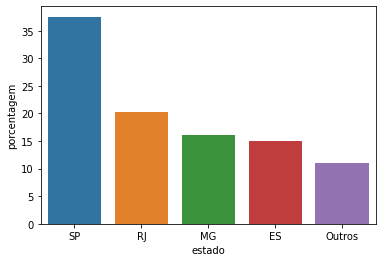

In [139]:
# Comparando em um ggráfico de barras
ax = sns.barplot(data=distribuidora, x="estado", y="porcentagem")

# **Questão 5**

In [140]:
def inverte_string(s):
    nova_string = ""
    for i in range(len(s)-1, -1, -1):
        nova_string += s[i]
    return nova_string

In [142]:
inverte_string('Matheus Caldas Sousa é o melhor estagiário que você pode contratar nesse momento!')

'!otnemom essen ratartnoc edop êcov euq oiráigatse rohlem o é asuoS sadlaC suehtaM'